In [59]:
import CM_code.spurious_george as sp
import numpy as np
import pyccl as ccl
import matplotlib.pyplot as plt
import scipy
import importlib as imp
import DL_basis_code.shared_functions_setup as setup

imp.reload(sp)

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['cmr10']
plt.rcParams['mathtext.fontset'] ='cm'
plt.rc('axes', unicode_minus=False)
plt.rc('axes.formatter', use_mathtext=True)

### SRD says:

- *This is done using the true redshift distribution, and then the binsare convolved with the photo-zerror distribution to make the photo-zdistributions.*

So bin/place limits in spec z then convolve to get photo-z

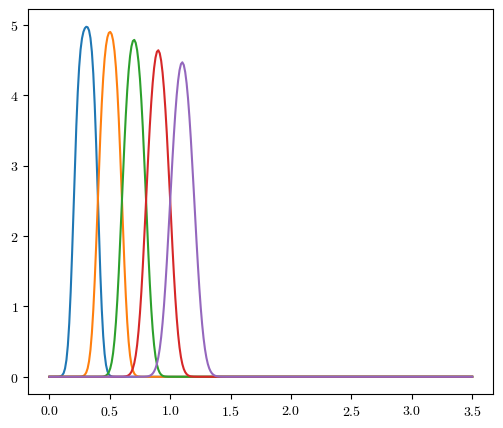

In [60]:
# get lens photo-z data
lens_phot = sp.zed.get_dndz_phot(gtype='lens',zl_min=0., zl_max=1.2)

lens_phot0 = sp.zed.get_dndz_phot(gtype='lens',zl_min=0.2, zl_max=0.4)
lens_phot1 = sp.zed.get_dndz_phot(gtype='lens',zl_min=0.4, zl_max=0.6)
lens_phot2 = sp.zed.get_dndz_phot(gtype='lens',zl_min=0.6, zl_max=0.8)
lens_phot3 = sp.zed.get_dndz_phot(gtype='lens',zl_min=0.8, zl_max=1.0)
lens_phot4 = sp.zed.get_dndz_phot(gtype='lens',zl_min=1.0, zl_max=1.2)

plt.figure(figsize=[6,5])
#plt.plot(lens_phot[0], lens_phot[1])
plt.plot(lens_phot0[0], lens_phot0[1])
plt.plot(lens_phot1[0], lens_phot1[1])
plt.plot(lens_phot2[0], lens_phot2[1])
plt.plot(lens_phot3[0], lens_phot3[1])
plt.plot(lens_phot4[0], lens_phot4[1])

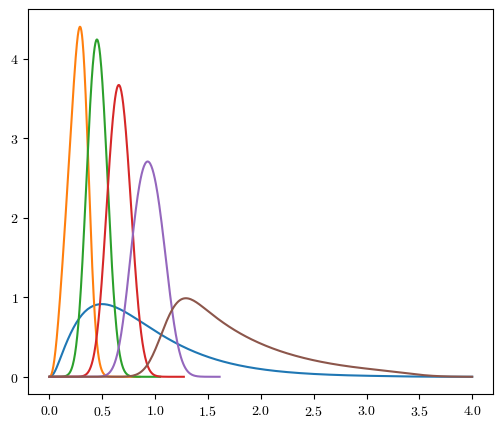

In [43]:
# get source photo-z data
source_phot = sp.zed.get_dndz_phot(gtype='source',zs_min=0., zs_max=3.5)

source_phot0 = sp.zed.get_dndz_phot(gtype='source',zs_min=0., 
                                    zs_max=0.35248524852485247)
source_phot1 = sp.zed.get_dndz_phot(gtype='source',zs_min=0.35248524852485247, 
                                    zs_max=0.5471047104710471)
source_phot2 = sp.zed.get_dndz_phot(gtype='source',zs_min=0.5471047104710471, 
                                    zs_max=0.7714771477147715)
source_phot3 = sp.zed.get_dndz_phot(gtype='source',zs_min=0.7714771477147715, 
                                    zs_max=1.10996099609961)
source_phot4 = sp.zed.get_dndz_phot(gtype='source',zs_min=1.10996099609961, 
                                    zs_max=3.5)

plt.figure(figsize=[6,5])
plt.plot(source_phot[0], source_phot[1])
plt.plot(source_phot0[0], source_phot0[1])
plt.plot(source_phot1[0], source_phot1[1])
plt.plot(source_phot2[0], source_phot2[1])
plt.plot(source_phot3[0], source_phot3[1])
plt.plot(source_phot4[0], source_phot4[1])

### Test how changing z_ph range affects boost values

In [44]:
# Convolve with error dist that goes to ZERO
imp.reload(sp)

boost, theta = sp.get_boosts()

print(boost)

Pk_gg calculated
xi_gg calculated
Order preserved for zl indices 0-299
xi_ls estimation complete
Order preserved for zl indices 0-299
Boost estimation complete
Runtime = 370.908 seconds
[0.07055466 0.04639448 0.0320132  0.02405953 0.01822948 0.01329403
 0.00914932 0.00583887 0.00339033 0.00175107]


In [45]:
# Convolve with error dist that goes to min z_Pi

imp.reload(sp)

boost, theta = sp.get_boosts()

print(boost)

Pk_gg calculated
xi_gg calculated
Order preserved for zl indices 0-299
xi_ls estimation complete
Order preserved for zl indices 0-299
Boost estimation complete
Runtime = 388.152 seconds
[0.09429857 0.05354952 0.03250654 0.02241816 0.0159059  0.01095674
 0.00716792 0.00437449 0.00244329 0.00122134]


In [61]:
lensFile = '/home/b7009348/WGL_project/LSST-SRD-data/DL-validation-covs/dNdz_clust_LSSTSRD_Y1_zb0_sigz0.03.dat'
sourceFile = '/home/b7009348/WGL_project/LSST-SRD-data/DL-validation-covs/dNdz_srcs_LSSTSRD_Y1_zb0_sigz0.05.dat'

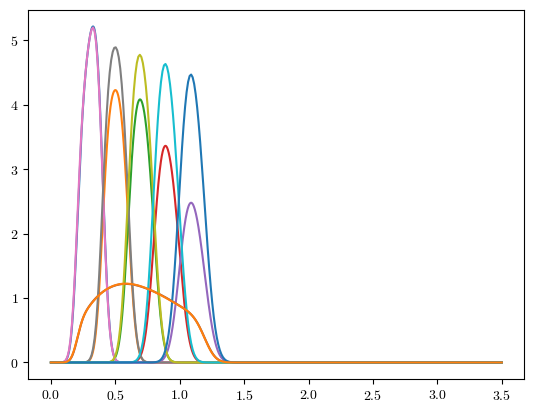

In [98]:
imp.reload(sp)
lensZ = np.loadtxt(lensFile)

all_lenses = lensZ[:,1]+lensZ[:,2]+lensZ[:,3]+lensZ[:,4]+lensZ[:,5]

lens_phot0 = sp.zed.get_dndz_phot(gtype='lens',zlmin=0.2, zlmax=0.4)
lens_phot1 = sp.zed.get_dndz_phot(gtype='lens',zlmin=0.4, zlmax=0.6)
lens_phot2 = sp.zed.get_dndz_phot(gtype='lens',zlmin=0.6, zlmax=0.8)
lens_phot3 = sp.zed.get_dndz_phot(gtype='lens',zlmin=0.8, zlmax=1.0)
lens_phot4 = sp.zed.get_dndz_phot(gtype='lens',zlmin=1.0, zlmax=1.2)

lens_phot = sp.zed.get_dndz_phot(gtype='lens', zlmin=0.2, zlmax=1.2)

plt.plot(lensZ[:,0], lensZ[:,1]/scipy.integrate.simps(lensZ[:,1],lensZ[:,0]))
plt.plot(lensZ[:,0], lensZ[:,2])
plt.plot(lensZ[:,0], lensZ[:,3])
plt.plot(lensZ[:,0], lensZ[:,4])
plt.plot(lensZ[:,0], lensZ[:,5])
plt.plot(lensZ[:,0],all_lenses/scipy.integrate.simps(all_lenses,lensZ[:,0]))

plt.plot(lens_phot0[0], lens_phot0[1])
plt.plot(lens_phot1[0], lens_phot1[1])
plt.plot(lens_phot2[0], lens_phot2[1])
plt.plot(lens_phot3[0], lens_phot3[1])
plt.plot(lens_phot4[0], lens_phot4[1])
plt.plot(lens_phot[0], lens_phot[1])


In [94]:
print(scipy.integrate.simps(lens_phot0[1],lens_phot0[0]))

0.9999999999999999
